In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import sklearn.metrics

In [ ]:
#Upload dos arquivos
from google.colab import files
uploaded = files.upload()

Saving Ruido1.xlsx to Ruido1 (1).xlsx
Saving Ruido2.xlsx to Ruido2 (1).xlsx
Saving SemRuido.xlsx to SemRuido (1).xlsx


In [ ]:
#Leitura dos dataset
arq0='SemRuido.xlsx'
semruido=pd.read_excel(arq0)
arq1='Ruido1.xlsx'
ruido1=pd.read_excel(arq1)
arq2='Ruido2.xlsx'
ruido2=pd.read_excel(arq2)

In [ ]:
#Aqui estamos deixando somente as informações dos nossos cenários
#Nossos cenários: blacksem, mefwiso, mfwisem, mstmiso

d1=d2=d3=d4=semruido
d1=d1[d1.acidente.str.contains('blacksem')]
d2=d2[d2.acidente.str.contains('mefwiso')]
d3=d3[d3.acidente.str.contains('mfwisem')]
d4=d4[d4.acidente.str.contains('mstmiso')]
semruido=[d1,d2,d3,d4]
semruido=pd.concat(semruido)

d5=d6=d7=d8=ruido2
d5=d5[d5.acidente.str.contains('blacksem')]
d6=d6[d6.acidente.str.contains('mefwiso')]
d7=d7[d7.acidente.str.contains('mfwisem')]
d8=d8[d8.acidente.str.contains('mstmiso')]
ruido2=[d5,d6,d7,d8]
ruido2=pd.concat(ruido2)

d9=d10=d11=d12=ruido1
d9=d9[d9.acidente.str.contains('blacksem')]
d10=d10[d10.acidente.str.contains('mefwiso')]
d11=d11[d11.acidente.str.contains('mfwisem')]
d12=d12[d12.acidente.str.contains('mstmiso')]
ruido1=[d9,d10,d11,d12]
ruido1=pd.concat(ruido1)

In [ ]:
semruido.shape,ruido1.shape,ruido2.shape

((244, 18), (244, 18), (244, 18))

In [ ]:
#Unindo os dataframes em um só
semruido=pd.DataFrame(semruido)
ruido1=pd.DataFrame(ruido1)
ruido2=pd.DataFrame(ruido2)

df=semruido.append(ruido1)
df=df.append(ruido2)
df.shape

(732, 18)

Pré-processamento acaba aqui

In [ ]:
output=df.pop('acidente')

In [ ]:
#1 hot label
labels= pd.get_dummies(output,prefix='acidente')
labels

,acidente_blacksem,acidente_mefwiso,acidente_mfwisem,acidente_mstmiso
61,1,0,0,0
62,1,0,0,0
63,1,0,0,0
64,1,0,0,0
65,1,0,0,0
...,...,...,...,...
666,0,0,0,1
667,0,0,0,1
668,0,0,0,1
669,0,0,0,1


In [ ]:
y=labels.values
x=df

In [ ]:
x.shape

(732, 17)

Feature_columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# test_size = 0.2: 20% pra teste, 80% pro treino
# random_state: quanto maior mais aleatória a escolha

In [ ]:
normalizer = MinMaxScaler(feature_range = (0, 1))

In [ ]:
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

**Treino**

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [ ]:
np.random.seed(1337)


In [ ]:
y.shape[1]

4

In [ ]:
input_layer = Input(shape=(x.shape[1],))
dense_layer_1 = Dense(5, activation='relu')(input_layer)
dense_layer_2 = Dense(5, activation='relu')(dense_layer_1)
#dense_layer_3 = Dense(20, activation='relu')(dense_layer_2)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=8, epochs=500, verbose=0, validation_split=0.2)

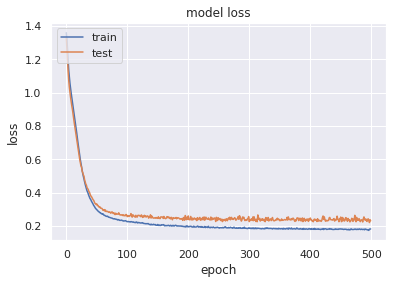

In [ ]:
import matplotlib.pyplot as plt #Para Gerar Plots

plt.plot(history.history['loss'][0:1000])
plt.plot(history.history['val_loss'][0:1000])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

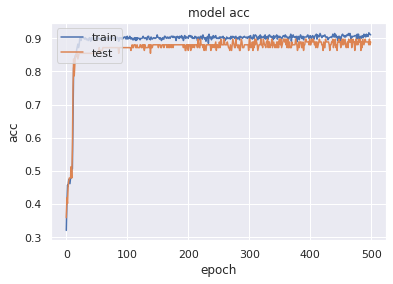

In [ ]:
plt.plot(history.history['acc'][0:1000])
plt.plot(history.history['val_acc'][0:1000])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])
print('R2_Score:', sklearn.metrics.r2_score(y_test, y_pred))

5/5 [==============================] - 0s 2ms/step - loss: 0.2321 - acc: 0.8503
Test Score: 0.23212692141532898
Test Accuracy: 0.8503401279449463
R2_Score: 0.7879323058342194
